## Fast R-CNN & Faster R-CNN
### 텐서플로를 활용한 Faster R-CNN 실습

In [1]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4084, done.
remote: Counting objects: 100% (4084/4084), done.
remote: Compressing objects: 100% (3069/3069), done.
remote: Total 4084 (delta 1191), reused 2892 (delta 955), pack-reused 0
Receiving objects: 100% (4084/4084), 44.60 MiB | 45.49 MiB/s, done.
Resolving deltas: 100% (1191/1191), done.


In [2]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing me

In [3]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
%matplotlib inline

In [4]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
hub_model = hub.load('https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1')

In [5]:
!wget https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg
image_path = '/content/three young man.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_np = np.array([image])

--2024-02-28 22:46:03--  https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146736 (143K) [image/jpeg]
Saving to: ‘three young man.jpg’

three young man.jpg 100%[===================>] 143.30K  --.-KB/s    in 0.03s   

2024-02-28 22:46:03 (4.98 MB/s) - ‘three young man.jpg’ saved [146736/146736]



In [6]:
results = hub_model(image_np)
result = {key: value.numpy() for key, value in results.items()}
print(result.keys())

label_id_offset = 0
image_np_with_detections = image_np.copy()

dict_keys(['detection_anchor_indices', 'detection_scores', 'num_detections', 'detection_multiclass_scores', 'detection_boxes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_classes'])


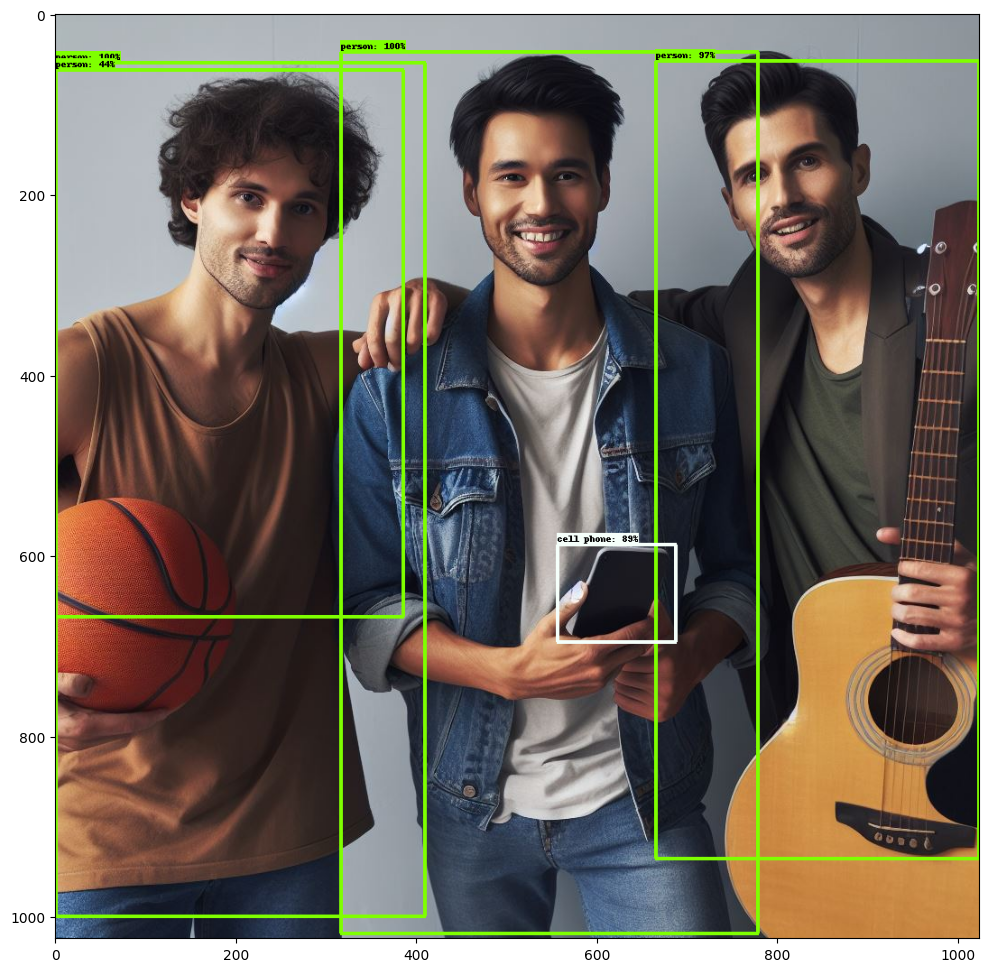

In [7]:
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections[0],result['detection_boxes'][0],
(result['detection_classes'][0] + label_id_offset).astype(int),
 result['detection_scores'][0],category_index,use_normalized_coordinates=True, max_boxes_to_draw=200,min_score_thresh=.30,
agnostic_mode=False)
plt.figure(figsize=(12, 12))
plt.imshow(image_np_with_detections[0])
plt.show()

## one-stage-detector
#### YOLO

In [8]:
!wget -N http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar \
      http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
!mkdir -p VOCtrainval_2007 VOCtest_2007
!tar -xvf VOCtrainval_06-Nov-2007.tar -C VOCtrainval_2007/
!tar -xvf VOCtest_06-Nov-2007.tar -C VOCtest_2007/
!pip install xmltodict


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/000778.jpg
VOCdevkit/VOC2007/JPEGImages/000779.jpg
VOCdevkit/VOC2007/JPEGImages/000781.jpg
VOCdevkit/VOC2007/JPEGImages/000783.jpg
VOCdevkit/VOC2007/JPEGImages/000784.jpg
VOCd

In [9]:
import numpy as np             # 배열 연산을 위한 라이브러리
import cv2                     # 이미지 처리를 위한 OpenCV 라이브러리
import xmltodict               # XML 파싱을 위한 라이브러리
from tqdm import tqdm          # 진행 상황 표시를 위한 라이브러리
import tensorflow as tf        # 딥러닝 프레임워크 텐서플로우
from glob import glob          # 파일 경로들을 리스트로 불러오는 라이브러리
from tensorflow.keras.callbacks import ModelCheckpoint    # 모델 중간 저장을 위한 콜백입니다.

!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png -O like_lenna.png # 테스트용 이미지를 다운로드합니다.

--2024-02-28 22:46:54--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30283 (30K) [image/png]
Saving to: ‘like_lenna.png’

like_lenna.png      100%[===================>]  29.57K  --.-KB/s    in 0.003s  

2024-02-28 22:46:54 (8.85 MB/s) - ‘like_lenna.png’ saved [30283/30283]



In [10]:
# 파일 경로 설정
train_x_path='/content/VOCtest_2007/VOCdevkit/VOC2007/JPEGImages'
train_y_path='/content/VOCtrainval_2007/VOCdevkit/VOC2007/Annotations'
test_x_path='/content/VOCtest_2007/VOCdevkit/VOC2007/JPEGImages'
test_y_path='/content/VOCtest_2007/VOCdevkit/VOC2007/Annotations'


In [11]:
# 학습 데이터의 이미지와 XML 파일 경로를 획득합니다.
image_file_path_list = sorted([x for x in glob(train_x_path + '/**')])
subset_size = len(image_file_path_list) // 70  # 전체 데이터의 약 1/70만 사용
image_file_path_list = image_file_path_list[:subset_size]
xml_file_path_list = sorted([x for x in glob(train_y_path + '/**')])
xml_file_path_list = xml_file_path_list[:subset_size]

# 테스트 데이터의 이미지와 XML 파일 경로를 획득합니다.
test_image_file_path_list = sorted([x for x in glob(test_x_path + '/**')])
subset_size = len(test_image_file_path_list) // 70  # 전체 데이터의 약 1/70만 사용
test_image_file_path_list = test_image_file_path_list[:subset_size]
test_xml_file_path_list = sorted([x for x in glob(test_y_path + '/**')])
test_xml_file_path_list = test_xml_file_path_list[:subset_size]


In [12]:
def get_classes_in_image(xml_file_list):
    classes_in_data_set = set()

    for xml_file_path in xml_file_list:
        with open(xml_file_path, 'r') as file:
            xml_file = xmltodict.parse(file.read())

            objects = xml_file['annotation']['object']

            # 항상 리스트 형태로 처리하기 위해 단일 객체도 리스트로 변환
            if not isinstance(objects, list):
                objects = [objects]

            for obj in objects:
                classes_in_data_set.add(obj['name'].lower())

    classes_in_data_set = sorted(classes_in_data_set)
    print(classes_in_data_set)
    return classes_in_data_set
classes_inDataSet = get_classes_in_image(test_xml_file_path_list)


['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


In [13]:
def get_label_fromImage(xml_file_path, Classes_inDataSet):
    def transform_coordinates(coordinates, Image_Width, Image_Height):
        x_min, y_min, x_max, y_max = coordinates
        x_min, x_max = [(224.0 / Image_Width) * x for x in [x_min, x_max]]
        y_min, y_max = [(224.0 / Image_Height) * y for y in [y_min, y_max]]
        x, y, w, h = (x_min + x_max) / 2.0, (y_min + y_max) / 2.0, (x_max - x_min) / 224.0, (y_max - y_min) / 224.0
        return x, y, w, h

    with open(xml_file_path, 'r') as f:
        xml_file = xmltodict.parse(f.read())

    Image_Height, Image_Width = float(xml_file['annotation']['size']['height']), float(xml_file['annotation']['size']['width'])
    label = np.zeros((7, 7, 25), dtype=float)

    objects = xml_file['annotation']['object']
    if not isinstance(objects, list): objects = [objects]

    for obj in objects:
        class_index = Classes_inDataSet.index(obj['name'].lower())
        coordinates = float(obj['bndbox']['xmin']), float(obj['bndbox']['ymin']), float(obj['bndbox']['xmax']), float(obj['bndbox']['ymax'])
        x, y, w, h = transform_coordinates(coordinates, Image_Width, Image_Height)
        x_cell, y_cell = int(x / 32), int(y / 32)
        x_val_inCell, y_val_inCell = (x - x_cell * 32.0) / 32.0, (y - y_cell * 32.0) / 32.0
        class_index_inCell = class_index + 5
        label[y_cell, x_cell, :5] = [x_val_inCell, y_val_inCell, w, h, 1.0]
        label[y_cell, x_cell, class_index_inCell] = 1.0

    return label


In [14]:
def make_dataset(image_file_path_list, xml_file_path_list, Classes_inDataSet):

    def process_image(image_file_path):
        image = cv2.imread(image_file_path)
        return cv2.resize(image, (224, 224)) / 255.0

    image_dataset = [process_image(image_path) for image_path in tqdm(image_file_path_list, desc="Processing images")]
    label_dataset = [get_label_fromImage(xml_path, Classes_inDataSet) for xml_path in tqdm(xml_file_path_list, desc="Processing labels")]

    image_dataset = np.array(image_dataset, dtype=np.float32)
    label_dataset = np.array(label_dataset, dtype=np.float32).reshape(-1, 7, 7, 25)

    return image_dataset, tf.convert_to_tensor(label_dataset)

train_image_dataset, train_label_dataset = make_dataset(image_file_path_list,xml_file_path_list,classes_inDataSet)
test_image_dataset, test_label_dataset = make_dataset(test_image_file_path_list,test_xml_file_path_list,classes_inDataSet)


Processing labels: 100%|██████████| 70/70 [00:00<00:00, 2616.49it/s]


In [15]:
# 모델 설계
max_num = len(tf.keras.applications.VGG16(weights='imagenet', include_top=False,  input_shape=(224, 224, 3)).layers)
YOLO = tf.keras.models.Sequential(name = "YOLO")
for i in range(0, max_num-1):
    YOLO.add(tf.keras.applications.VGG16(weights='imagenet', include_top=False,  input_shape=(224, 224, 3)).layers[i])

initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.01)
regularizer = tf.keras.regularizers.l2(0.0005)

for layer in YOLO.layers:
    layer.trainable=False
    if (hasattr(layer,'activation'))==True:
        layer.activation = leaky_relu


58889256/58889256 [==============================] - 0s 0us/step


In [16]:
def add_conv_layer(YOLO, filters, name):
    YOLO.add(tf.keras.layers.Conv2D(filters, (3, 3),activation=leaky_relu,kernel_initializer=initializer,kernel_regularizer=regularizer,padding='SAME',name=name,dtype='float32'))

def add_dense_layer(YOLO, units, name, activation=leaky_relu, dropout=None):
    YOLO.add(tf.keras.layers.Dense(units,activation=activation,kernel_initializer=initializer,kernel_regularizer=regularizer,name=name,dtype='float32'))
    if dropout:
        YOLO.add(tf.keras.layers.Dropout(dropout))

# 모델에 층 추가
add_conv_layer(YOLO, 1024, "detection_conv1")
add_conv_layer(YOLO, 1024, "detection_conv2")
YOLO.add(tf.keras.layers.MaxPool2D((2, 2)))
add_conv_layer(YOLO, 1024, "detection_conv3")
add_conv_layer(YOLO, 1024, "detection_conv4")

# 밀집 층 추가
YOLO.add(tf.keras.layers.Flatten())
add_dense_layer(YOLO, 4096, "detection_linear1", dropout=0.5)
add_dense_layer(YOLO, 1470, "detection_linear2", activation=None)

# 결과 구조 재배열
YOLO.add(tf.keras.layers.Reshape((7, 7, 30), name='output', dtype='float32'))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [17]:
# 손실 함수 정의
def yolo_multitask_loss(y_true, y_pred):

    batch_loss = 0

    for true_vals, pred_vals in zip(y_true, y_pred):
        true_vals = tf.reshape(true_vals, [49, 25])
        pred_vals = tf.reshape(pred_vals, [49, 30])
        cell_losses = []
        for true_cell, pred_cell in zip(true_vals, pred_vals):
            bbox1_pred, bbox1_pred_confidence, bbox2_pred, bbox2_pred_confidence, class_pred = \
                pred_cell[:4], pred_cell[4], pred_cell[5:9], pred_cell[9], pred_cell[10:]
            bbox_true, bbox_true_confidence, class_true = \
                true_cell[:4], true_cell[4], true_cell[5:]

            def calculate_iou(bbox_pred, bbox_true):

                pred_area = bbox_pred[2] * bbox_pred[3]
                true_area = bbox_true[2] * bbox_true[3]

                pred_minmax = [bbox_pred[0] - 0.5*bbox_pred[2], bbox_pred[1] - 0.5*bbox_pred[3],
                               bbox_pred[0] + 0.5*bbox_pred[2], bbox_pred[1] + 0.5*bbox_pred[3]]

                true_minmax = [bbox_true[0] - 0.5*bbox_true[2], bbox_true[1] - 0.5*bbox_true[3],
                               bbox_true[0] + 0.5*bbox_true[2], bbox_true[1] + 0.5*bbox_true[3]]

                inter_xy_min = tf.maximum(pred_minmax[:2], true_minmax[:2])
                inter_xy_max = tf.minimum(pred_minmax[2:], true_minmax[2:])

                inter_area = tf.maximum(0.0, inter_xy_max[0] - inter_xy_min[0]) * \
                             tf.maximum(0.0, inter_xy_max[1] - inter_xy_min[1])
                union_area = pred_area + true_area - inter_area
                return inter_area / union_area
            iou_bbox1 = calculate_iou(bbox1_pred, bbox_true)
            iou_bbox2 = calculate_iou(bbox2_pred, bbox_true)
            responsible_bbox = bbox1_pred if iou_bbox1 > iou_bbox2 else bbox2_pred
            responsible_bbox_confidence = bbox1_pred_confidence if iou_bbox1 > iou_bbox2 else bbox2_pred_confidence
            non_responsible_bbox_confidence = bbox2_pred_confidence if iou_bbox1 > iou_bbox2 else bbox1_pred_confidence
            obj_exist = 1.0 - tf.cast(tf.reduce_all(tf.equal(bbox_true, 0.0)), tf.float32)

            localization_err = tf.reduce_sum(tf.square(bbox_true - responsible_bbox)) * obj_exist
            confidence_err_obj = tf.square(responsible_bbox_confidence - bbox_true_confidence) * obj_exist
            confidence_err_noobj = 0.5 * tf.square(non_responsible_bbox_confidence) * (1.0 - obj_exist)
            classification_err = tf.reduce_sum(tf.square(class_true - class_pred)) * obj_exist

            cell_loss = 5.0 * localization_err + confidence_err_obj + confidence_err_noobj + classification_err
            cell_losses.append(cell_loss)

        batch_loss += tf.reduce_sum(cell_losses)

    batch_loss /= tf.cast(tf.shape(y_true)[0], tf.float32)
    return batch_loss

In [18]:
BATCH_SIZE = 64
EPOCHS = 120
SAVE_PATH = 'yolo.h5'

def lr_schedule(epoch):
    if epoch < 75:
        return 0.001 + 0.001 * (epoch / 75.0)
    elif epoch < 105:
        return 0.001
    else:
        return 0.0001

def compile_and_train_model(model, train_data, val_data):
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        SAVE_PATH,
        verbose=1,
        save_best_only=True
    )

    lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(loss=yolo_multitask_loss, optimizer=optimizer, run_eagerly=True)

    model.fit(
        train_data[0], train_data[1],
        batch_size=BATCH_SIZE,
        validation_data=val_data,
        epochs=EPOCHS,
        verbose=1,
        callbacks=[checkpoint_callback, lr_callback]
    )
compile_and_train_model(YOLO, (train_image_dataset, train_label_dataset), (test_image_dataset, test_label_dataset))

Epoch 1/120


2/2 [==============================] - ETA: 0s - loss: 33.3247  
Epoch 1: val_loss improved from inf to 25.64050, saving model to yolo.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 260s 113s/step - loss: 33.3247 - val_loss: 25.6405 - lr: 0.0010
Epoch 2/120
2/2 [==============================] - ETA: 0s - loss: 25.0680  
Epoch 2: val_loss improved from 25.64050 to 23.39462, saving model to yolo.h5
2/2 [==============================] - 203s 106s/step - loss: 25.0680 - val_loss: 23.3946 - lr: 0.0010
Epoch 3/120
2/2 [==============================] - ETA: 0s - loss: 22.6901  
Epoch 3: val_loss improved from 23.39462 to 22.03415, saving model to yolo.h5
2/2 [==============================] - 200s 103s/step - loss: 22.6901 - val_loss: 22.0342 - lr: 0.0010
Epoch 4/120
2/2 [==============================] - ETA: 0s - loss: 20.9142  
Epoch 4: val_loss did not improve from 22.03415
2/2 [==============================] - 194s 98s/step - loss: 20.9142 - val_loss: 22.9157 - lr: 0.0010
Epoch 5/120
2/2 [==============================] - ETA: 0s - loss: 22.7863  
Epoch 5: val_loss did not improve from 22.03415
2/2 [========================

In [19]:
IMAGE_SIZE = (224, 224)
CELL_SIZE = 32

def convert_to_corner_coordinates(x, y, bbox, image_size):
    bbox_x = (CELL_SIZE * x + bbox[0] * CELL_SIZE) * image_size[0] / IMAGE_SIZE[0]
    bbox_y = (CELL_SIZE * y + bbox[1] * CELL_SIZE) * image_size[1] / IMAGE_SIZE[1]
    bbox_w = bbox[2] * image_size[0]
    bbox_h = bbox[3] * image_size[1]

    min_x = int(bbox_x - bbox_w/2)
    min_y = int(bbox_y - bbox_h/2)
    max_x = int(bbox_x + bbox_w/2)
    max_y = int(bbox_y + bbox_h/2)

    return [min_x, min_y, max_x, max_y]

def process_single_bbox(x, y, bbox, image_size, classes_score, class_names):
    idx_highest_score = np.argmax(classes_score)
    highest_score = classes_score[idx_highest_score]
    highest_score_name = class_names[idx_highest_score]

    corner_coords = convert_to_corner_coordinates(x, y, bbox, image_size)

    return corner_coords + [highest_score, highest_score_name]

def nms(bbox_list, threshold=0.6):
    return [bbox for bbox in bbox_list if bbox[4] > threshold]

def get_YOLO_output(YOLO, image_path, class_names):
    image_cv = cv2.imread(image_path)
    original_h, original_w, _ = image_cv.shape
    image_resized = cv2.resize(image_cv, IMAGE_SIZE) / 255.0
    image_input = np.expand_dims(image_resized, axis=0).astype('float32')

    yolo_output = YOLO(image_input)[0].numpy()

    bbox_list = []
    for y in range(7):
        for x in range(7):
            bbox1 = yolo_output[y][x][:4]
            bbox2 = yolo_output[y][x][5:9]
            bbox1_score = yolo_output[y][x][10:] * yolo_output[y][x][4]
            bbox2_score = yolo_output[y][x][10:] * yolo_output[y][x][9]

            bbox1_processed = process_single_bbox(x, y, bbox1, (original_w, original_h), bbox1_score, class_names)
            bbox2_processed = process_single_bbox(x, y, bbox2, (original_w, original_h), bbox2_score, class_names)

            bbox_list.extend([bbox1_processed, bbox2_processed])

    nms_boxes = nms(bbox_list)

    for bbox in nms_boxes:
        cv2.rectangle(image_cv, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)

    cv2.imwrite('output.jpg', image_cv)

In [20]:
get_YOLO_output(YOLO,'/content/like_lenna.png',classes_inDataSet)

## YOLO v3

In [21]:
%cd /content
!rm -rf darknet
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make
!ls -al darknet
!./darknet

/content
Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 30.93 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolution

In [22]:
%cd /content/darknet
!wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2024-02-29 05:20:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  31.0MB/s    in 11s     

2024-02-29 05:20:33 (22.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

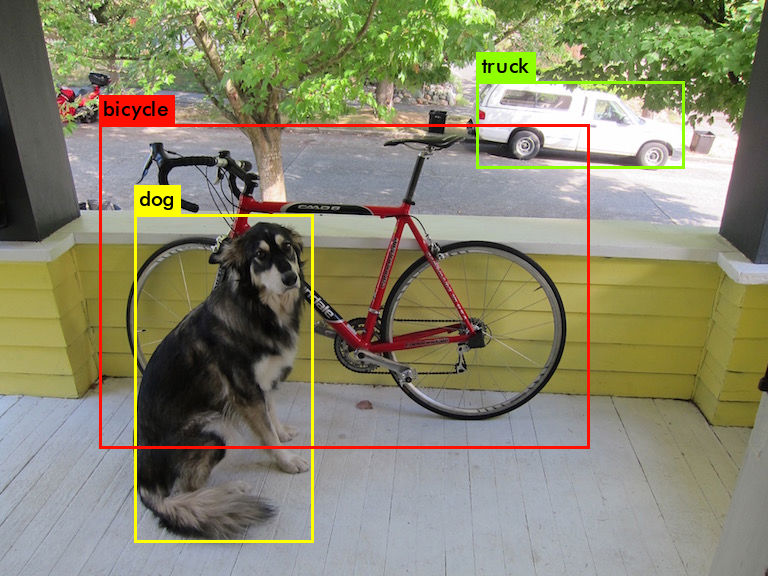

In [23]:
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

from IPython.display import Image
Image('predictions.jpg')

In [24]:
%cd /content
!rm -rf darknet
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make
!ls -al darknet
!./darknet
%cd /content/darknet
!wget https://pjreddie.com/media/files/yolov3.weights

/content
Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 29.53 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolution

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

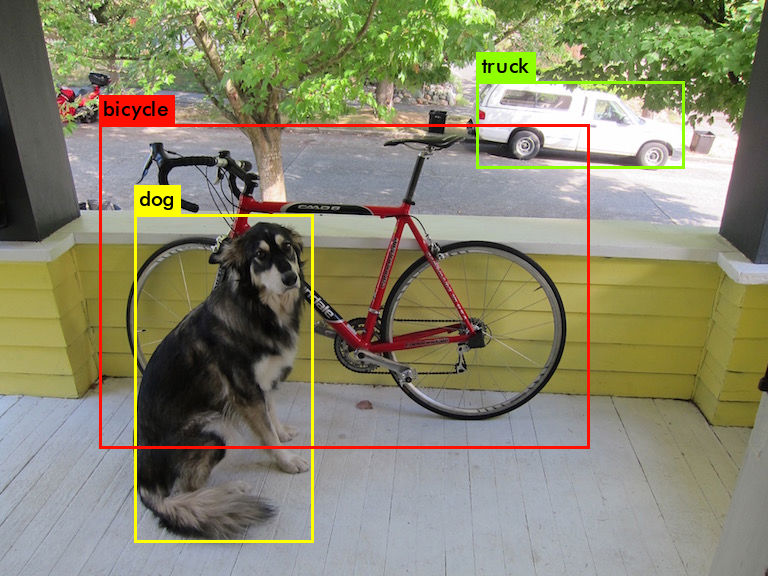

In [25]:
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

from IPython.display import Image
Image('predictions.jpg')


## EfficientDET 실습

In [26]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import time
model = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite0/detection/1")
!wget https://github.com/Cobslab/imageBible/blob/main/image/test_image.png?raw=true -O test_image.png

--2024-02-29 05:22:02--  https://github.com/Cobslab/imageBible/blob/main/image/test_image.png?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Cobslab/imageBible/raw/main/image/test_image.png [following]
--2024-02-29 05:22:02--  https://github.com/Cobslab/imageBible/raw/main/image/test_image.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Cobslab/imageBible/main/image/test_image.png [following]
--2024-02-29 05:22:02--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/test_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent

In [27]:
labels_mapping = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [28]:
def detect_objects(model, img_array, threshold, max_objects=100, print_time=True):
    img_copy = img_array.copy()
    green = (0, 255, 0)
    red = (0, 0, 255)
    tensor_img = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]
    start = time.time()
    boxes, scores, classes, num_detections = model(tensor_img)
    boxes = boxes.numpy()
    scores = scores.numpy()
    classes = classes.numpy()
    num_detections = num_detections.numpy()

    for i in range(num_detections[0]):
        if scores[0, i] < threshold:
            break
        box = boxes[0, i]
        left, top, right, bottom = box[1], box[0], box[3], box[2]
        class_id = classes[0, i]
        caption = "{}: {:.4f}".format(labels_mapping[class_id], scores[0, i])
        cv2.rectangle(img_copy, (int(left), int(top)), (int(right), int(bottom)), color=green, thickness=2)
        cv2.putText(img_copy, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red, 1)

    if print_time:
        print('탐지 시간 :', round(time.time() - start, 2), "seconds")

    return img_copy

탐지 시간 : 3.6 seconds


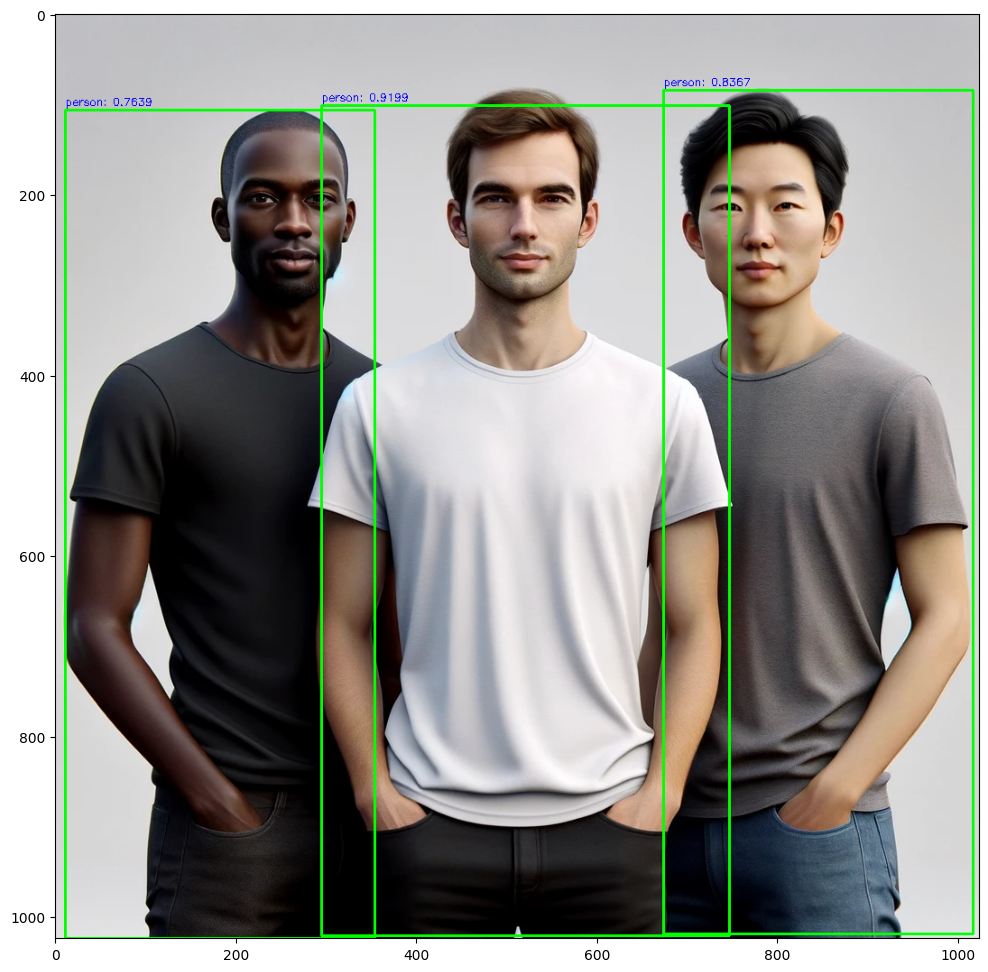

In [29]:
img_array = cv2.cvtColor(cv2.imread('test_image.png'), cv2.COLOR_BGR2RGB)
processed_img = detect_objects(model, img_array, 0.3, 100, True)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(processed_img)